# THE SPARK FOUNDATION DATA SCIENCE INTERNSHIP

### LINEAR REGRESSION MODEL

### By Aleksandrina Likova

There are two types of supervised machine learning algorithms: Regression and classification. The former predicts continuous value outputs while the latter predicts discrete outputs. For instance, predicting the price of a house in dollars is a regression problem whereas predicting whether a tumor is malignant or benign is a classification problem.

Let's consider a scenario where we want to determine the linear relationship between the numbers of hours a student studies and the percentage of marks that student scores in an exam. We want to find out that given the number of hours a student prepares for a test, about how high of a score can the student achieve? If we plot the independent variable (hours) on the x-axis and dependent variable (percentage) on the y-axis, linear regression gives us a straight line that best fits the data points

y = mx + b

Where b is the intercept and m is the slope of the line. So basically, the linear regression algorithm gives us the most optimal value for the intercept and the slope (in two dimensions). The y and x variables remain the same, since they are the data features and cannot be changed. The values that we can control are the intercept and slope. There can be multiple straight lines depending upon the values of intercept and slope. Basically what the linear regression algorithm does is it fits multiple lines on the data points and returns the line that results in the least error.

This same concept can be extended to the cases where there are more than two variables. This is called multiple linear regression. For instance, consider a scenario where you have to predict the price of house based upon its area, number of bedrooms, average income of the people in the area, the age of the house, and so on. In this case the dependent variable is dependent upon several independent variables. A regression model involving multiple variables can be represented as:

    

        y = b0 + m1b1 + m2b2 + m3b3 + ... ... mnbn
    

This is the equation of a hyper plane. Remember, a linear regression model in two dimensions is a straight line; in three dimensions it is a plane, and in more than three dimensions, a hyper plane.

### Simple Linear Regression

In this regression task we will **predict the percentage of marks that a student is expected to score based upon the number of hours they studied**. This is a simple linear regression task as it involves just two variables.

## Step 1: Import our libraries
To build our model, we will need some tools at our disposal to make the process as seamless as possible. We will not go through all the libraries but will take the time to explain a few.

1. **Pandas** - This will make grabbing and transforming the data quick.
2. **Sklearn** - We can leverage the built-in machine learning models they have.
3. **Scipy** - This will make interpreting our output much more comfortable.
4. **Matplotlib** - Visuals are critical to analysis, and this library will help us build those visuals.

In [52]:
#Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import statsmodels.api as sm

import math 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

import ipywidgets as widgets
from IPython.display import display

style = {'description_width': 'initial'}

%matplotlib inline

***
## Step 2: Load the Data
We want our data in a DataFrame as this will give it the proper structure need to analyze the data. Once we load the data into a DataFrame, we need an index so we will set that equal to our date column. Finally, it is good to check the data looks correct before moving on, so let us print out the first five rows using the `head()` method.

In [2]:
dataset = pd.read_csv('student_scores.csv')

In [8]:
#This means that our dataset has 25 rows and 2 columns. 
dataset.shape

(25, 2)

In [4]:
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


***
## Step 3: Clean the data
The chances of getting a perfectly cleaned dataset that meets all of the requirements is slim to none, so to make this tutorial more realistic we will clean the data. Here is the checklist when it comes to cleaning the data:

> 1. Check the data types, to make sure they are correct. For example, it usually does not make sense for a number to be a string.
> 2. Make sure the column names are correct. Having the correct column names makes the process of selecting data easier.
> 3. Check for and drop/fill missing values. Dropping errors helps to control for errors when running.

In [6]:
# check the data types, in this case everything looks fine no changes need to be made.
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

**MISSING VALUES**, they can be a problem because they can create errors when running calcs. The first thing is we should always check to see if there are any missing values. If we use the `.isna().any()` method on the DataFrame it will return each column with a boolean, where `True` means it has missing values and `False` means it does not have any missing values. Once, we know the data has missing values we can use the `dropna()` method to drop any rows that have a missing value.

In [7]:
# check for missing values
display(dataset.isna().any())

Hours     False
Scores    False
dtype: bool

***
## Section 4: Explore the Data
Okay, now that we have a clean dataset let us explore it a little. Again, this is a critical step as it helps us understand some of the following questions:

1. How is the data distributed?
2. Does there appear to be a relationship between the two variables?
3. Are there any outliers?
4. Is the data skewed?

By better understanding the answers to these questions we can validate whether we need to do further transformations or if we need to change the model we picked.

***
### 4.1 Build a Scatter Plot
Scatter plots help us visualize the relationship between our data, so let us plot our data using the graph so we can explore the relationship. We need to define the x-coordinate and the y-coordinate, and then plot them using the `plot()` method. Now, we did a few formatting steps, so our graph comes out logically.

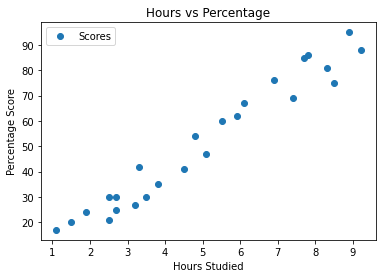

In [8]:
#In the script above, we use plot() function of the pandas dataframe 
#and pass it the column names for x coordinate and y coordinate, which are "Hours" and "Scores" respectively.

dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

***
### 4.2 Measure the Correlation
At first glance, we can tell there is some relationship here because they seem to be moving in tandem. The relationship means if one goes up the other appears to go up as well and also tells us it appears to be a positive relationship because they both move up. However, if we would like to attach a number to this relationship so we can quantify it. Well, in this case, let us measure the correlation between the two variables. We will take the DataFrame and call the `corr()` method to return a DataFrame with the metrics.

In [9]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Okay, so there is a correlation and a strong one at that. Generally speaking, this is how we measure the strength of correlations.

 - Very strong relationship **(|r|>0.8 =>)**
 - Strong relationship **(0.6≤|r|)**
 - Moderate relationship **(0.4≤|r|)**
 - Weak relationship **(0.2≤|r|)**
 - Very weak relationship **(|r|)** 

***
### 4.3 Create a Statistical Summary
Okay, so we see there is a correlation let us create a statistical summary to help describe the dataset. We will use the `describe()` method to output a DataFrame with all this info.

In [10]:
# The basic statistical details of the dataset can be shown with the describe():
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Conclustion:**

Nothing stands out as a concern at this point, our range is healthy:

- [x] The data set has 25 students / examples for both columns
- [x] The mean (average) of Hours for studying is 5h, while the score that the students receive is approx. 51.58 points
- [x] All the data falls within 3 Standard deviations of the mean

***
### 4.4 Checking for Outliers and Skewness
We do not want outliers, and we want to make sure our data does not have skew because this could impact results in specific models. The first thing we will do is a plot a histogram for each column of data. The data will help us get a good idea of the distribution. Once, we have done that we will do some hard measurements to validate our visuals.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DBD27FB850>,
      dtype=object)

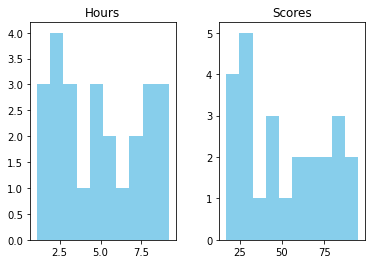

In [12]:
dataset.hist(grid = False, color = 'skyblue')

Okay, so some of the data does appear to be skewed but not too much. However, we probably should verify this by taking some measurements. Two good metrics we can use are the kurtosis and skew, where kurtosis measure the height of our distribution and skew measures whether it is positively or negatively skewed. We will use the `scipy.stats` module to do the measurements.

In [15]:
# calculate the excess kurtosis using the fisher method. The alternative is Pearson which calculates regular kurtosis.
hours_kurtosis = kurtosis(dataset['Hours'], fisher = True)
scores_kurtosis = kurtosis(dataset['Scores'], fisher = True)

In [16]:
# calculate the skewness
hours_skew = skew(dataset['Hours'])
scores_skew = skew(dataset['Scores'])

In [17]:
display("Hours Kurtosis: {:.2}".format(hours_kurtosis))  # this looks fine
display("Scores Kurtosis: {:.2}".format(scores_kurtosis))      # this looks fine

display("Hours Skew: {:.2}".format(hours_skew))          # moderately skewed
display("Scores Skew: {:.2}".format(scores_skew))              # moderately skewed, it's a little high but we will accept it.

'Hours Kurtosis: -1.3'

'Scores Kurtosis: -1.4'

'Hours Skew: 0.18'

'Scores Skew: 0.22'

We can also perform a `kurtosistest()` and `skewtest()` on our data to test whether the data is normally distributed. With these two functions we test the null hypothesis that the kurtosis of the population from which the sample was drawn is that of the normal distribution: kurtosis = 3(n-1)/(n+1) & the null hypothesis that the skewness of the population that the sample was drawn from is the same as that of a corresponding normal distribution, respectively.

However, there is a **big caveat** to this.  As our dataset grows larger, the chances of us rejecting the null hypothesis increases even if there is only slight kurtosis or skew. In other words, even if our dataset is slightly non-normal, we will reject the null hypothesis. These results are unrealistic because the chances of us having a perfectly normal dataset are very very slim, so we have to take these results with a grain of salt.

In [18]:
# perform a kurtosis test
display('Hours')
display(stats.kurtosistest(dataset['Hours']))
display('Scores')
display(stats.kurtosistest(dataset['Scores']))

# perform a skew test
display('Hours')
display(stats.skewtest(dataset['Hours']))
display('Scores')
display(stats.skewtest(dataset['Scores']))

'Hours'

KurtosistestResult(statistic=-2.3546827942087125, pvalue=0.018538523251855534)

'Scores'

KurtosistestResult(statistic=-2.88496896645191, pvalue=0.0039145224745987615)

'Hours'

SkewtestResult(statistic=0.43471771430143935, pvalue=0.663767338738614)

'Scores'

SkewtestResult(statistic=0.5333411520056848, pvalue=0.5937974458549717)

**Conclusion:**

If we look at the results above, we will reject the null hypothesis 3 out of 4 times, even with the data being slightly skewed or having mild kurtosis. This is why we always need to visualize the data and calculate the metrics before running these test.

***

**Kurtosis**
- Any distribution with **kurtosis ≈3 (excess ≈0)** is called mesokurtic. This is a normal distribution
- Any distribution with **kurtosis <3 (excess kurtosis <0)** is called platykurtic. Tails are shorter and thinner, and often its central peak is lower and broader.
- Any distribution with **kurtosis >3 (excess kurtosis >0)** is called leptokurtic. Tails are longer and fatter, and often its central peak is higher and sharper.

***

**Skewness**
- If skewness is **less than −1 or greater than +1**, the distribution is highly skewed.
- If skewness is **between −1 and −½ or between +½ and +1**, the distribution is moderately skewed.
- If skewness is **between −½ and +½**, the distribution is approximately symmetric.

## Section 5: Build the Model
At this point, we feel comfortable moving forward other than the data being slightly skewed nothing else is stopping us from going with the linear regression model.

***
### 5.1 Split the Data
The first thing we need to do is split the data into a training set and a test set. The training set is what we will train the model on and the test set is what we will test it on. The convention is to have 20% dedicated to testing and the remaining 80% to training, but these are not hard limits.

Now we have an idea about statistical details of our data. The next step is to divide the data into "attributes" and "labels". Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset we only have two columns. We want to predict the percentage score depending upon the hours studied. Therefore our attribute set will consist of the "Hours" column, and the label will be the "Score" column. To extract the attributes and labels, execute the following script:

In [19]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

The attributes are stored in the X variable. We specified "-1" as the range for columns since we wanted our attribute set to contain all the columns except the last one, which is "Scores". Similarly the y variable contains the labels. We specified 1 for the label column since the index for "Scores" column is 1. Remember, the column indexes start with 0, with 1 being the second column.

In [54]:
#4 Creating training set and testing set
from sklearn.model_selection import train_test_split
test_size = widgets.FloatSlider(min=0.01, max=0.6, value=0.2, description="Test Size :", tooltips=['Usually 20-30%'])
display(test_size)

FloatSlider(value=0.2, description='Test Size :', max=0.6, min=0.01)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size.value, random_state=0)

In [56]:
print("Training Set :\n----------------\n")
print("X = \n", X_train[:5])
print("y = \n", y_train[:5])

print("\n\nTest Set :\n----------------\n")
print("X = \n",X_test[:5])
print("y = \n", y_test[:5])

Training Set :
----------------

X = 
 [[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]]
y = 
 [35 24 86 76 17]


Test Set :
----------------

X = 
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
y = 
 [20 27 69 30 62]


***
### 5.2 Create & Fit the model
Making the model surprises many people of how easy this step is. All we do is create an instance of the linear regression model from Sklearn and then call the `fit()` method to train the model on our training data.

In [57]:
"""# II. Simple Linear Regressor """

# import SLR library
from sklearn.linear_model import LinearRegression

# configure params for the model.
fit_int_wig = widgets.ToggleButtons(
                options=['TRUE', 'FALSE'],
                description='Fit Intercept :',
                disabled=False,
                style=style,
                tooltips=['whether to calculate the intercept for this model. If set to False,\
                          no intercept will be used in calculations.'])

display(fit_int_wig)

norm_wig = widgets.ToggleButtons(
                value='FALSE',
                options=['TRUE', 'FALSE'],
                description='Normalize :',
                disabled=False,
                tooltips=['This parameter is ignored when fit_intercept is set to False. \
                            If True, the regressors X will be normalized before regression by \
                            subtracting the mean and dividing by the l2-norm.'],
                style=style)

display(norm_wig)

njobs_wig = widgets.Dropdown(options=[('One', 1), ('Two', 2), ('Three', 3), ('All Cores', -1)], 
                             description="Number of CPU Cores = ", style=style)

display(njobs_wig)

ToggleButtons(description='Fit Intercept :', options=('TRUE', 'FALSE'), style=ToggleButtonsStyle(description_w…

ToggleButtons(description='Normalize :', index=1, options=('TRUE', 'FALSE'), style=ToggleButtonsStyle(descript…

Dropdown(description='Number of CPU Cores = ', options=(('One', 1), ('Two', 2), ('Three', 3), ('All Cores', -1…

In [58]:
# Train the Regressor with training set
regression_model = LinearRegression(fit_intercept=fit_int_wig.value, normalize=norm_wig.value,
                            n_jobs=njobs_wig.value)

#fit the linear model
regression_model.fit(X_train, y_train)

#7 predict the outcome of test sets
y_pred = regression_model.predict(X_test)
print("\nPredictions = ", y_pred)


Predictions =  [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [59]:
## SIMPLE WAY WITHOUT THE BUTTONS
#from sklearn.linear_model import LinearRegression
#regression_model = LinearRegression()
#regression_model.fit(X_train, y_train)

With Scikit-Learn it is extremely straight forward to implement linear regression models, as all you really need to do is import the LinearRegression class, instantiate it, and call the fit() method along with our training data. 

In the theory section we said that linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slop calculated by the linear regression algorithm for our dataset, execute the following code.

***
### 5.3 Explore the output
Let us see what got sent back to us. First, we can check the coefficient of each independent variable in our model. In this case, it is just the oil price. After that let us take a look at the intercept of our regression formula.

In [38]:
# let's grab the coefficient of our model and the intercept.
print("Intercept: ", regression_model.intercept_)
# For retrieving the slope (coefficient of x):
print("The slope (coefficient of x):", regression_model.coef_)

Intercept:  2.018160041434683
The slope (coefficient of x): [9.91065648]


**CONCLUSION:**

> - Interpreting the coefficient, we would say that a single unit increase in hours of studying **is associated with a 9.91%** increase in the exam score.
> - **We are NOT CLAIMING CAUSATION, just association.**

*In simplier words, if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.*

***
### 5.4 Making Multiple Predictions at Once
Great, so we have a good working model let us test it on the data we set aside. We will call the `predict()` method and pass through our `X_test` dataset at which point a list of predictions will be returned to us.

Now that we have trained our algorithm, it's time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. 

In [39]:
# Get multiple predictions.
y_pred = regression_model.predict(X_test)

# Show the first 5 predictions
y_pred[:5]

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

The y_pred is a numpy array that contains all the predicted values for the input values in the X_test series.

## Section 6: Evaluating the Model

Once we have a functioning model that we can use to make predictions we need to evaluate how useful our model is. There is no sense of using a model that makes horrible predictions, so we should look at different metrics to see how it did.

Now to make this process easier on ourselves, we are going to recreate our same model using the `statsmodel.api` library. The reason why is that they have numerous built-in functions that make calculating metrics like confidence intervals and p-values a breeze. The output from the `statsmodel.api` will not be identical to our `sklearn` library but it will be very close.

In [26]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model.
model = sm.OLS(y, X2)

# fit the data
est = model.fit()

***
### 6.1 Confidence Intervals
First, let us calculate confidence intervals. Keep in mind that by default that the calculated using 95% intervals. We interpret this by saying if the population from which this sample was drawn was sampled 100 times. Approximately 95 of those confidence intervals would contain the "true" coefficient.

Why do we provide a confidence range? Well, it comes from the fact that we only have a sample of the population, not the entire population itself. Because of this concept, means that the "true" coefficient could exist in the interval below or it couldn't, but we cannot say for sure. We provide some uncertainty by providing a range, usually 95% interval, where the coefficient is probably in.

In [27]:
# make some confidence intervals, 95% by default.
est.conf_int()

array([[-2.75347039,  7.7208172 ],
       [ 8.83882269, 10.71278409]])

***
### 6.2 Hypothesis Testing

- **Null Hypothesis:** There is NO relationship between the Hours of studying and the exam scores.
    - The coefficient equals 0.
- **Alternative Hypothesis:** There is a relationship between the Hours of studying and the exam scores.
    - The coefficient does not equal to 0.
    
- If we reject the null, we are saying there is a relationship, and the coefficient does not equal 0.
- If we fail to reject the null, we are saying there is no relationship, and the coefficient does equal 0.

In [29]:
# estimate the p-values.
est.pvalues

array([3.36778543e-01, 9.13262447e-17])

The p-value represents the probability that the coefficient equals 0. We want a p-value that is less than 0.05 if it is, we can reject the null hypothesis. In this case, the p-value is much lower than 0.05, so we can reject the null hypothesis and say that there is a relationship.

## Section 7: Model Fit

We can examine how well our data fit the model, so we will take `y_predictions` and compare them to our `y_actuals` these will be our residuals. From here we can calculate a few metrics to help quantify how well our model fits the data. Here are a few popular metrics:

- **Mean Absolute Error (MAE):** Is the mean of the absolute value of the errors. This metric gives an idea of magnitude but no idea of direction (too high or too low).

- **Mean Squared Error (MSE):** Is the mean of the squared errors.MSE is more popular than MAE because MSE "punishes" more significant errors.

- **Root Mean Squared Error (RMSE):** Is the square root of the mean of the squared errors. RMSE is even more favored because it allows us to interpret the output in y-units.

Luckily for us, `sklearn` and `statsmodel` both contain functions that will calculate these metrics for us.

##### To compare the actual output values for X_test with the predicted values, execute the following script:

In [30]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [47]:
#8 Claculating the Accuracy of the predictions
from sklearn import metrics
print("Prediction Accuracy = ", metrics.r2_score(y_test, y_pred))

#9 Comparing Actual and Predicted Salaries for he test set
print("\nActual vs Predicted Salaries \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_pred,
                         "Abs. Error" : np.abs(y_test - y_pred)})

error_df

Prediction Accuracy =  0.9454906892105356

Actual vs Predicted Salaries 
------------------------------



,Actual,Predicted,Abs. Error
0,20,16.884145,3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


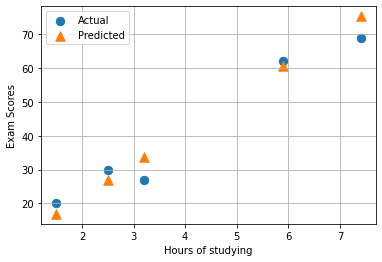

In [50]:
#Plotting Actual observation vs Predictions
plt.scatter(X_test,y_test, s = 70, label='Actual')
plt.scatter(X_test,y_pred, s = 90, marker = '^', label='Predicted')
plt.xlabel('Hours of studying')
plt.ylabel('Exam Scores')
plt.legend();
plt.grid();
plt.show();

Though our model is not very precise, the predicted percentages are close to the actual ones.

#### Note:

The values in the columns above may be different in your case because the train_test_split function randomly splits data into train and test sets, and your splits are likely different from the one shown here.

### Evaluating the Algorithm

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:


    Mean Absolute Error (MAE) is the mean of the absolute value of the errors
    Mean Squared Error (MSE) is the mean of the squared errors
    Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors


In [31]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


#### You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job.

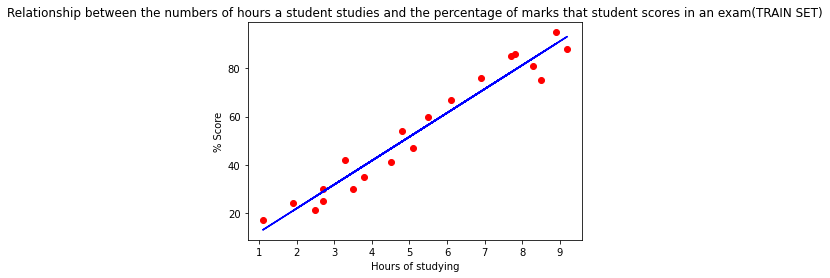

In [40]:
# Visualising the Training set results

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regression_model.predict(X_train), color = 'blue')
plt.title('Relationship between the numbers of hours a student studies and the percentage of marks that student scores in an exam(TRAIN SET)')
plt.xlabel('Hours of studying')
plt.ylabel('% Score')
plt.show()

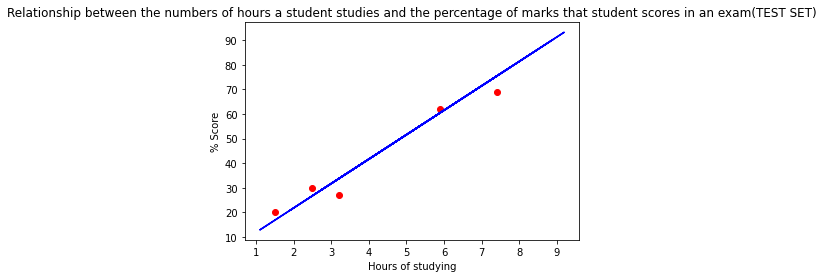

In [41]:
# Visualising the Test set results

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regression_model.predict(X_train), color = 'blue')
plt.title('Relationship between the numbers of hours a student studies and the percentage of marks that student scores in an exam(TEST SET)')
plt.xlabel('Hours of studying')
plt.ylabel('% Score')
plt.show()

***
## R-Squared
The R-Squared metric provides us a way to measure the goodness of fit or how well our data fits the model. The higher the R-Squared metric, the better the data fit our model. However, we have to know the limitations of R-Square. One limitation is that R-Square increases as the number of feature increases in our model, so it does not pay to select the model with the highest R-Square. A more popular metric is the adjusted R-Square which penalizes more complex models. Let us calculate both.

In [34]:
model_r2 = r2_score(y_test, y_pred)
print("R2: {:.2}".format(model_r2))

R2: 0.95


***
### Create a Summary of the Model Output
Let us create a summary of some of our keep metrics, Sklearn does not have a good way of creating this output so we would have to calculate all the metrics ourselves. Let us avoid this and use the `statsmodel.api` library as we can create the same model we did up above, but we can also leverage the `summary()` method to create an output for us. Some of the metrics might differ slightly, but they generally should be the same

In [35]:
# print out a summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           9.13e-17
Time:                        12:51:52   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.3

## Step 8: Save the Model for future use
We will probably want to use this model in the future, so let us save our work so we can use it later. Saving the model can be achieved by storing our model in a pickle which is storing a python object as a character stream in a file which can be reloaded later to use.

In [42]:
import pickle

# pickle the model.
with open('my_linear_regression.sav','wb') as f:
     pickle.dump(regression_model,f)

# load it back in.
with open('my_linear_regression.sav', 'rb') as pickle_file:
     regression_model_2 = pickle.load(pickle_file)

## **SOLUTION:**

## What will be predicted score if a student studies for 9.25 hrs/ day?

In [43]:
# make a new prediction.

regression_model_2.predict([[9.25]])

array([93.69173249])

## **CONCLUSTION:**

## If we study 9.25 hrs/day, our predicted score will be 93.69 points, and the prediction accuracy is 94.5%